In [97]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge,ElasticNetCV,LarsCV,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [98]:

train = pd.read_csv('/Users/saptarshipal/DATA/flood_prediction/data/dataset/flood_prediction/train.csv')
test = pd.read_csv('/Users/saptarshipal/DATA/flood_prediction/data/dataset/flood_prediction/test.csv')

print(train.shape,test.shape)

(1117957, 22) (745305, 21)


In [99]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [100]:
test.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [101]:
train1 = train.drop(columns = 'id',axis =1)
test1 = test.drop(columns = 'id',axis =1)

In [102]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [103]:
train1.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [104]:
train1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


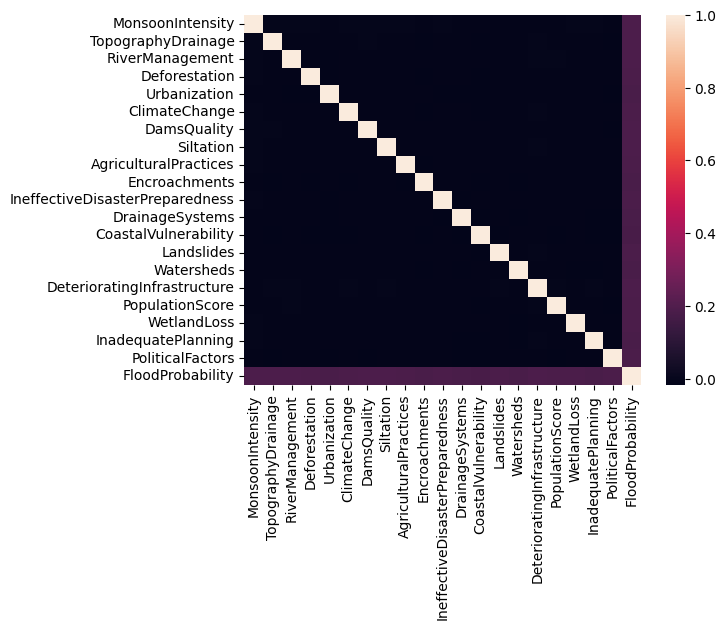

In [105]:
plt.Figure(figsize=(15,15))
sns.heatmap(train1.corr())
plt.show()

In [106]:
'''
for col in train1.columns:
    sns.histplot(train1[col])
    plt.show()
    
'''

'\nfor col in train1.columns:\n    sns.histplot(train1[col])\n    plt.show()\n    \n'

In [107]:
train1.corr()[['FloodProbability']].sort_values(by = 'FloodProbability', ascending=False)

,FloodProbability
FloodProbability,1.000000
DeterioratingInfrastructure,0.190007
MonsoonIntensity,0.189098
DamsQuality,0.187996
TopographyDrainage,0.187635
RiverManagement,0.187131
Siltation,0.186789
PopulationScore,0.185890
Landslides,0.185346
ClimateChange,0.184761


In [108]:
'''
for col in train1.columns:
    sns.lineplot(data=train1,x ='FloodProbability',y=col)
    plt.show()
'''

"\nfor col in train1.columns:\n    sns.lineplot(data=train1,x ='FloodProbability',y=col)\n    plt.show()\n"

In [109]:
# Calculate skewness for each column
skewness_train = train1.skew()

print(skewness_train)

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442168
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449248
AgriculturalPractices              0.421145
Encroachments                      0.463551
IneffectiveDisasterPreparedness    0.443369
DrainageSystems                    0.441420
CoastalVulnerability               0.439917
Landslides                         0.425099
Watersheds                         0.450488
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451415
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437561
FloodProbability                   0.047226
dtype: float64


In [110]:
skewness_test = test1.skew()

print(skewness_test)

MonsoonIntensity                   0.439721
TopographyDrainage                 0.460379
RiverManagement                    0.413858
Deforestation                      0.438962
Urbanization                       0.448930
ClimateChange                      0.431096
DamsQuality                        0.441073
Siltation                          0.454715
AgriculturalPractices              0.417417
Encroachments                      0.454514
IneffectiveDisasterPreparedness    0.449724
DrainageSystems                    0.437780
CoastalVulnerability               0.436780
Landslides                         0.423822
Watersheds                         0.450639
DeterioratingInfrastructure        0.443566
PopulationScore                    0.447294
WetlandLoss                        0.432166
InadequatePlanning                 0.452317
PoliticalFactors                   0.444029
dtype: float64


In [111]:
train1['MonsoonIntensity'] = np.log1p(8+train1['MonsoonIntensity'])

In [112]:
train1['MonsoonIntensity'].skew()

0.00390098922523565

<Axes: xlabel='MonsoonIntensity', ylabel='Count'>

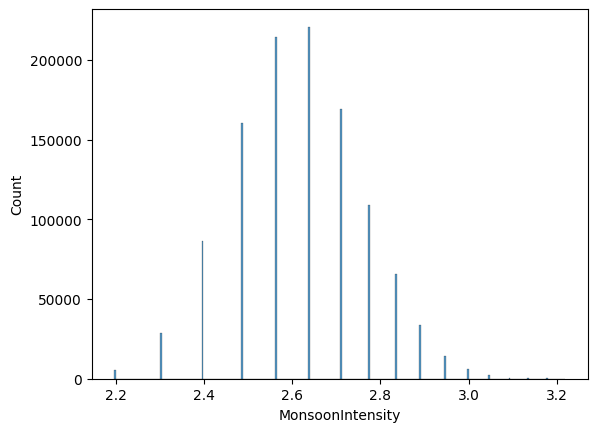

In [113]:
sns.histplot(train1['MonsoonIntensity'])

# Splitting the dataset

In [205]:
y = train1['FloodProbability']
X = train1.drop(columns = 'FloodProbability')

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=567)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(894365, 20) (223592, 20) (894365,) (223592,)


# Modelling

In [208]:
def evaluate_regressors(X_train,X_test,y_train,y_test):
    models = {'lr':LinearRegression()
            #,'ridge':Ridge()
            #,'lasso':Lasso()
            #,'ElasticNet':ElasticNet()
            #,'SGDRegressor':SGDRegressor()
            #,'BayesianRidge':BayesianRidge()
            #,'DecisionTreeRegressor':DecisionTreeRegressor()
            #,'RandomForestRegressor':RandomForestRegressor()
            #,'ExtraTreesRegressor':ExtraTreesRegressor()
            #,'KNeighborsRegressor':KNeighborsRegressor()
            #,'SVR':SVR()
            #,'GaussianProcessRegressor':GaussianProcessRegressor()
            #,'XGBRegressor':XGBRegressor()
            #,'LGBMRegressor':LGBMRegressor()
            #,'CatBoostRegressor':CatBoostRegressor()
            }
    
    results = []
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test,y_pred)
        results.append({"name":name,'model':model,'mae':mae,'r2':r2})
        
    df_results = pd.DataFrame(results).sort_values(by=['mae'],ascending=True, ignore_index= True).round(2)
    return df_results

df_scores = evaluate_regressors(X_train,X_test,y_train,y_test)
print(df_scores)

  name               model   mae    r2
0   lr  LinearRegression()  0.02  0.85


In [209]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the r2 of "+str(df_scores.iloc[0,3]))

The best model is lr with the r2 of 0.85


In [210]:
selected_model = df_scores.iloc[0,1]
selected_model

LinearRegression()

In [211]:
selected_model.fit(X_train,y_train)
y_pred = selected_model.predict(X_test)

In [212]:
comp_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
print(comp_df)

        y_test    y_pred
11181    0.440  0.449401
71251    0.480  0.488549
601427   0.455  0.460817
832695   0.455  0.460391
946267   0.465  0.494185
...        ...       ...
490225   0.505  0.511215
844030   0.500  0.511094
868104   0.625  0.635649
508237   0.485  0.499565
31037    0.500  0.494632

[223592 rows x 2 columns]


In [213]:
# Calculating predicted values
ys = selected_model.predict(test1)

In [214]:
# Saving the predicted data
submission1 = pd.DataFrame({'id': test['id'], 'FloodProbability': ys.ravel()})
submission1.to_csv('submission1.csv', index=False)
submission1

,id,FloodProbability
0,1117957,0.573680
1,1117958,0.455240
2,1117959,0.454766
3,1117960,0.466137
4,1117961,0.466016
...,...,...
745300,1863257,0.477170
745301,1863258,0.449264
745302,1863259,0.624365
745303,1863260,0.550995
